In [1]:
from modules.env import *
env4()
from modules.molprep import *
from modules.descriptors import *
from modules.fingerprint import *
from modules.processing import *
from modules.model import Model
from modules.model import ModelC
from modules.importance import *
from modules.plots import *
from modules.image import *
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from __future__ import print_function
from numpy import mean
from IPython.display import Image, display

import sys
from modules.basic import *

DEBUG=True
def pause(DEBUG,s="Pause: push a button to continue",):
    if DEBUG:
        input(s)
        print ("continue ........")
#pause(DEBUG)
######################################

The workflow
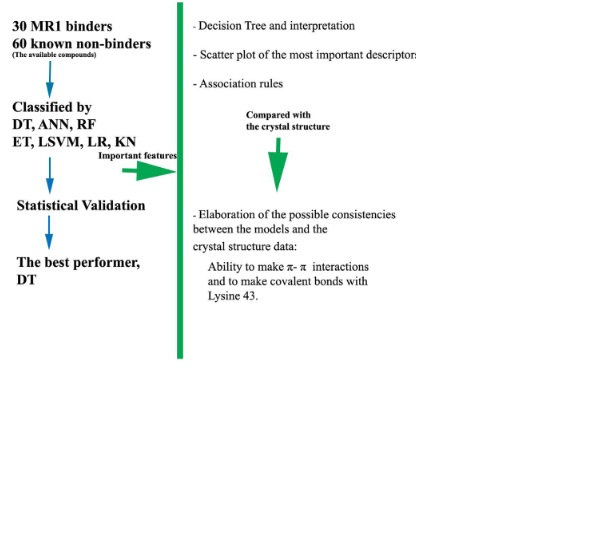

The modeling process. 
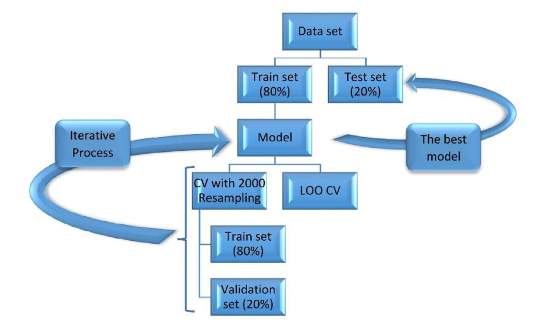

In [2]:
path="data_MR1/"
log(os.getcwd(),DEBUG)

#input
sdffile=path+"all.sdf"
sdffilet=path+"ex_test.sdf"
activity=path+"MR1.csv"
#output
twod=path+"MR1-2d.sdf"
threed=path+"MR1-3D.sdf"
des_csv=path+"Descriptors_Table_MR1.csv"
twodt=path+"MR1-2d_t.sdf"
threedt=path+"MR1-3D_t.sdf"
des_csvt=path+"Descriptors_Table_t_MR1.csv"
des_datafile=path+"des-MR1.data"
finger_table=path+"Descriptors_Table-finger.csv"
finger_data=path+"finger-MR1.data"
frag_csv=path+"Descriptors_Table_MR1_des_frag.csv"
frag2_csv=path+"Descriptors_Table_MR1_des_frag2.csv"
frag3_csv=path+"Descriptors_Table_MR1_des_frag3.csv"
model_data=path+"model_MR1.data"
lime_data=path+"lime_MR1.data"
limet_data=path+"limet_MR1.data"
treei_data=path+"tree_MR1.data"
imagepath1=path+"images/"
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 500  # Set Duration To 1000 ms == 1 second
############################################################################################################################################

D:\pych\ml\MR1


In [17]:
#For the first time preparation of the data from the input sdf file
Molecules = mol_enumerate(sdffile,threed,twod, format="sdf")

1
ago-anta-Tetrahydroxy-1-4-quinone-hydrate.1 to 3d
2
ago-strong-anta_CID_8536-Menadione sodium bisulfite.1 to 3d
3
ago_CID_2333-Benzbromarone.1 to 3d
4
ago_CID_2722-Chloroxine.1 to 3d
5
ago_CID_5790-Floxuridine.1 to 3d
6
ago_CID_667490-Mercaptopurine.1 to 3d
7
ago_CID_5281616-Galangin.1 to 3d
8
anta_CID_10637-1-2-Naphthoquinone-4-sulfonic acid.1 to 3d
9
anta_CID_50942-Doxofylline.1 to 3d
10
anta_CID_122903-Dehydroacetic-acid.1 to 3d
11
anta_CID_5280445-Luteolin.1 to 3d
12
anta_CID_5280961-Genistein.1 to 3d
13
anta_CID_5281605-Baicalein.1 to 3d
14
CID_1-4-Benzodioxan-6-carboxaldehyde.1 to 3d
15
CID_6-Chloro-4-hydroxy-coumarine.1 to 3d
16
CID_227-Anthranilic-acid.1 to 3d
17
CID_323-Coumarin.1 to 3d
18
CID_1047-2-Pyrazinecarboxylic-acid.1 to 3d
19
CID_2015-Acridone.1 to 3d
20
CID_2022-Acyclovir.1 to 3d
21
CID_2265-Azathioprine.1 to 3d
22
CID_2471-Bumetanide.1 to 3d
23
CID_2662-Celecoxib.1 to 3d
24
CID_2720-Chlorothiazide.1 to 3d
25
CID_3059-Diflunisal.1 to 3d
26
CID_3182-Dyphylline.1 to 

In [3]:
#For generating descriptor table using rdkit descriptors
data_list = desc (threed,type="sdf")
data_table=dataframe(data_list, input_activities=activity,output=des_csv,type1="file", type2="des")
#print (data_table)
set1 = data_prep (des_csv, Scaled ="on", Normal = "off", FS="clas", Cor="on", TARGET="cat1", ndes =13, rs=100, vt=0.5, output=des_datafile)


In [4]:
#finger
data_list = desc (threed,type="sdf")
fp_list = make_fingerprints(rdkit.Chem.SDMolSupplier(threed),data_list)
data_table=dataframe(fp_list, input_activities=activity,TARGET="cat1", output=finger_table,type1=threed,type2="finger")
set = data_prep (finger_table, Scaled ="off", Normal = "off", FS="reg", Cor="on", TARGET="cat1", ndes =50, rs=1,output=finger_data,vt=0)

ago-anta-Tetrahydroxy-1-4-quinone-hydrate.1.gif


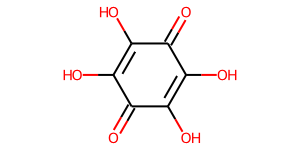

##################################################################################
ago-strong-anta_CID_8536-Menadione sodium bisulfite.1.gif


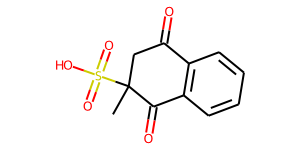

##################################################################################
ago_CID_2333-Benzbromarone.1.gif


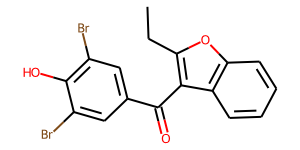

##################################################################################
ago_CID_2722-Chloroxine.1.gif


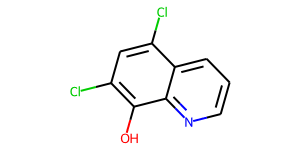

##################################################################################


In [5]:
#generating images
#Molecules = mol_enumerate(sdffile,threed,twod, format="sdf", image=True, imagepath=imagepath1)

#Image(filename=imagepath1+"ago_CID_2722-Chloroxine.1.gif")

# A loop to show molecule images
i=0
for filename1 in os.listdir(imagepath1):
    if filename1.endswith(".gif"):
        i=i+1
        if i < 5:# to suppress long output
            print (filename1)
            display(Image(filename=imagepath1+filename1))
            print ("##################################################################################")
        
#data_list=image("D:/pych/ml/MR1/images/", ".svg", path+"images_raw.csv")
#data_table=dataframe(data_list, input_activities="D:/pych/ml/dr3/IC50.csv",output="D:/pych/ml/dr3/Descriptors_Table_images.csv",type1="D:/pych/ml/dr3/MR1.sdf",type2="image")
#set = data_prep ("D:/pych/ml/dr3/Descriptors_Table_images.csv", Scaled ="on", Normal = "off", FS="clas", Cor="off", ndes =100, rs=100, vt=0.0
                    # , output="D:/pych/ml/dr3/image-MR1.data")#cor=on will raise error for very larg data like images due to MemoryError



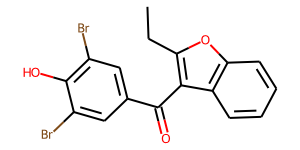

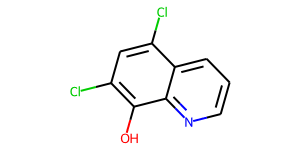

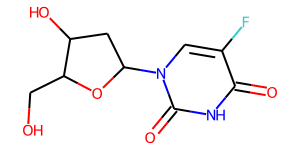

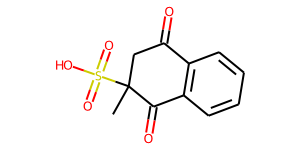

Number of features -->  13
Number of features after feature selection --> 105


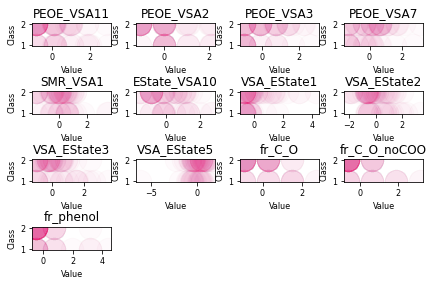

In [6]:
f=[]
set1 = file2object(des_datafile)

print ("Number of features --> ", len(set1[4]))
print ("Number of features after feature selection -->", len(set1[7]))

f=["fr_C_O_noCOO", "fr_phenol",  "PEOE_VSA2"]#The most 3 important features
f1=["fr_C_O_noCOO", "fr_phenol", "PEOE_VSA2", "NumHDonors", "VSA_Estate8"]#The most 5 imprtant features

#set1[0].iloc[:, 10]

#allx = pd.concat([set1[0], set1[2]], axis=0)
#ally = list(set1[1]) + list(set1[3])
    
#set1[0]= x_train, set1[1]= y_train
myplot(set1[0], set1[1], n=4, type="scat") 
    
       

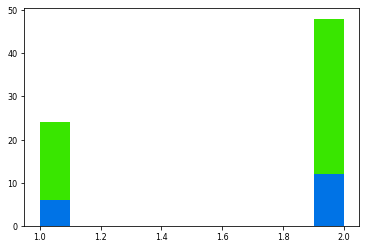

In [7]:
#set1[1]= y_train, set1[3]=y_test
plt.hist(set1[1] ,bins=10, color ="#39e600" )
plt.hist(set1[3], bins=10, color="#0073e6")
plt.show()
    
    

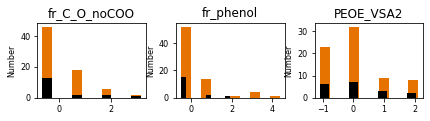

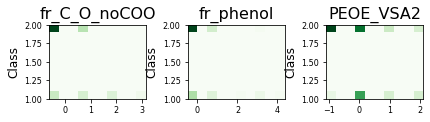

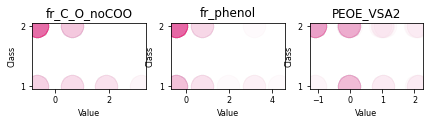

In [8]:
#set1[0]= x_train, set1[2]=x_test
myplot (set1[0].loc[:,f],set1[1],n=3,type="his", df2=set1[2].loc[:, f], y2=set1[3])
myplot(set1[0].loc[:, f], set1[1], n=3, type="his2d")
myplot(set1[0].loc[:, f], set1[1], n=3, type="scat")


The most important variables
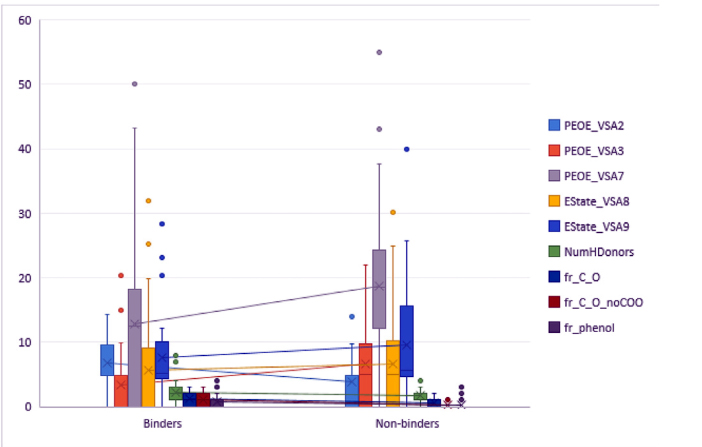

Three important variables
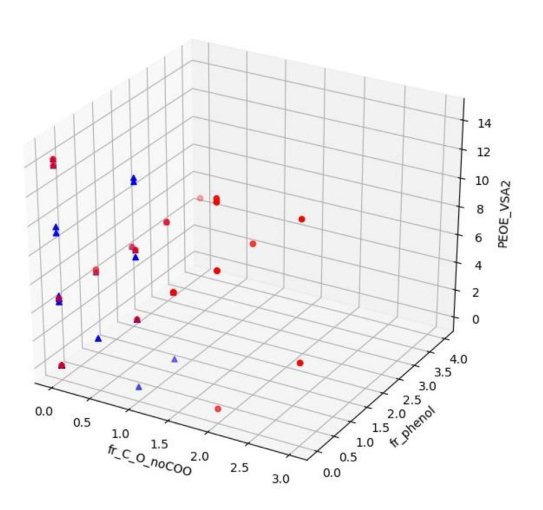

In [9]:
#################################################################################################################################################################################################################
reg = [ "pls", "mlr", "rf", "lsvm", "lasso","nn", "tree", "rg",  "or", "brg",  "hub", "sgdr", "ex", "gb","ada"]
#svm,"el", "la", "ll",, "ardr":long , "ransa", "kn", "gu", "bg", "the": a bit long
reg2= ["rf","ex","gb","nn","svm"]
clas2=["rf","lsvm", "tree", "ex", "lr","kn","gunb"]
clas3=["lr","lsvm","kn"]
c=10
################################################################################################################

In [10]:
#Loop over diifferent algorithms and RSs of the Models
print ("LOOP")
set1 = file2object(des_datafile)

print ("Number of features --> ", len(set1[4]))
print ("Number of features after feature selection -->", len(set1[7]))

c = 1
for m2 in clas3:

    print (50 * "*")
    print ("model= ", m2)
    #print ()"test set", set1[3])
    # !!!!!It is a big NO to compare the models according to the performance on the test set!!!!!
    for s in range (100,101):
        model = ModelC (set1[0],set1[1],set1[2],set1[3],set1[4], M=m2, c1=c,  cv="loo", rs=s)#cv=loo
        if m2 !="mlr":
            #print (m2, s, "R2=", model[0]["R2"], "q2=", model[1]["q2"], "q2F=",model[1]["Q2F2"],"R2test=",model[0]["R2_test"], "R2-q2=", model[0]["R2"]- model[1]["q2"])# model[0]["Pearson"],
            print (m2, s, "Ac=", model[0]["accuracy_score_train"], "Ac_CV=", model[0]["accuracy_score_LOO"], "Ac_test=", model[0]["accuracy_score_test"])  # model[0]["Pearson"],#VI=np.sort(model[0]["Variable Importance"])
            VI = model[0]["Variable Importance"]
            print (VI[0:3])

            print("confusion matrix train", model[0]["confusion matrix"])
            print("confusion matrix CV", model[0]["confusion matrix_CV"])
            print("confusion matrix test",
                    ((str(model[0]["confusion matrix_test"].tolist())).replace('L', '')).replace(',', ';'))

            print ("###################################################################################")
            #print(model[0]) #To print complete results
            print("###################################################################################")
        else:
            print ("q2=", model[1],"q2F2=",model[1]["Q2F2"],model[0])

        #lime2(model[2], set1[0], set1[4], n=8)
        #tree(model[2], set1[0], set1[4])
        #partial(set1[0],set1[1],model[0]["Variable Importance"],n=4)
    print (50 * "#")
#xx=set1[0].loc[:,f]
#xxt=set1[2].loc[:,f]
#fff=f
    





LOOP
Number of features -->  13
Number of features after feature selection --> 105
**************************************************
model=  lr
lr 100 Ac= 0.8888888888888888 Ac_CV= 0.8194444444444444 Ac_test= 0.8333333333333334
                     0
fr_C_O_noCOO -1.114463
fr_phenol    -1.013243
PEOE_VSA2    -0.376747
confusion matrix train [[19  3]
 [ 5 45]]
confusion matrix CV [[16  5]
 [ 8 43]]
confusion matrix test [[3; 0]; [3; 12]]
###################################################################################
###################################################################################
##################################################
**************************************************
model=  lsvm
lsvm 100 Ac= 0.9027777777777778 Ac_CV= 0.8055555555555556 Ac_test= 0.7777777777777778
                     0
fr_C_O_noCOO -0.709753
fr_phenol    -0.509509
VSA_EState3  -0.251728
confusion matrix train [[19  2]
 [ 5 46]]
confusion matrix CV [[16  6]
 [ 8 42]]
confusion matrix

Decision Tree
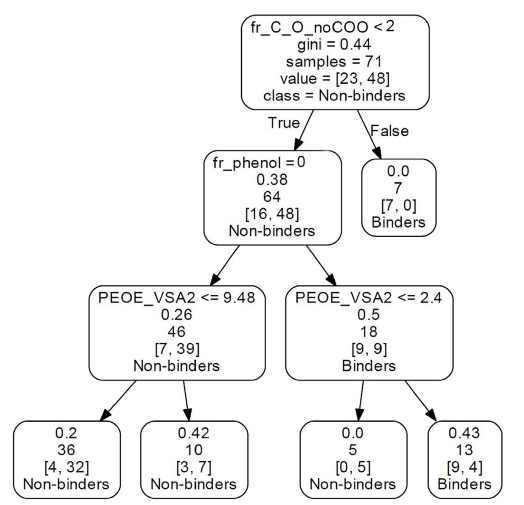

In [11]:
print ("Local")
#set1 = data_prep(des_csv, Scaled="on", Normal="off", FS="reg", Cor="on", ndes=50, rs=1, vt=0.5,TARGET="cat1",
                    #output=set_data)
set1 = file2object(des_datafile)

model = ModelC (set1[0],set1[1],set1[2],set1[3],set1[4], M="nn", c1=10,  cv="kf", rs=85)
object2file(model,model_data)
model=file2object(model_data)
    
#VI1=np.sort(model[0]["Variable Importance"])
VI2 = model[0]["Variable Importance"]
#print VI1
print (VI2)

#partial(set1[0], set1[1], model[0]["Variable Importance"], n=7) #this line prodce error in scikit-learn 0.24

#winsound.Beep(frequency, duration)

#print set1[4]
#print set1[4][15]
#print set1[4][56]
#print set1[4][0]
#print set1[0]

range1=[54,76,117,720,50,237,275,279,1012,1030,1082,1105,1131,1144]
range2=[76,1131]
lime=False
if lime:#for complete data set
    lime3=lime2(model[1], set1[0], set1[4],n=6,y=set1[1],i=0)
    object2file(lime3,lime_data)
    lime3=file2object(lime_data)
    #for i in range(len(lime3)):
        #print"number",i, lime3[i]
    for i in range1:
        print("Lime number",i," #####", lime3[i])
    #input("pause")
lime_short = True
if lime_short:#to test the algorithm on only 3 molecules
    lime5=lime2(model[1], set1[0][0:3], set1[4],n=6,y=set1[1][0:3],i=0)
    object2file(lime5,limet_data)
    lime5=file2object(limet_data)
    for i in range(len(lime5)):
        print("Lime number",i," #####", lime5[i])
    #input("pause")
#winsound.Beep(frequency, duration)
#sys.stdout = open(path+"lime2.txt", "w+")

treei=False   
if treei:#I would not be able to install Treeinterpreter by conda
    TreeI=tree(model[2], set1[0], set1[4],set1[1])
    print (TreeI[2])
    #object2file(TreeI, "D:/pych/ml/qsar-mr1/treei.data")
    tree_in3 = file2object(treei_data)
    #print len (tr_in[0])
    #for i in range(len(tr_in[0])):
        #print"number",i, tr_in[0][i]
    for i in range1:
        print("TreeI number",i, tree_in3[0][i])

        print (i, set1[0].index.tolist()[i])
    #print "all df", tr_in[1]
    #print "average importance in the set", tr_in[2]

   

Local
                     0
fr_phenol    -5.556731
fr_C_O_noCOO -4.452237
fr_C_O       -3.366075
PEOE_VSA2    -3.224670
PEOE_VSA11   -1.212577
VSA_EState3  -0.876762
VSA_EState5  -0.425657
VSA_EState2  -0.396347
SMR_VSA1     -0.326893
PEOE_VSA3     2.232218
VSA_EState1   2.239537
EState_VSA10  3.053280
PEOE_VSA7     3.826551
lime is processing molecule 0
...
Intercept 1.0651493811379362
Prediction_local [1.34231504]
Right: 2
exp.predicted_value 2
y[i] 2
exp.score 0.4843561448705632
exp.as_list() [('fr_phenol <= 1.93', 0.4600515038963208), ('EState_VSA10 <= 0.57', -0.1923331307214602), ('SMR_VSA1 <= 0.02', 0.11160583553148924), ('PEOE_VSA7 <= -0.13', -0.09368854666964811), ('VSA_EState5 > 0.65', -0.09283083371658252), ('VSA_EState3 <= 0.65', 0.08436083132467921)]
lime is processing molecule 1
...
Intercept 1.3987501750803588
Prediction_local [1.07301037]
Right: 1
exp.predicted_value 1
y[i] 1
exp.score 0.4632100710153487
exp.as_list() [('1.93 < fr_phenol <= 3.14', -0.4718696209621844), 

In [20]:
#Working on an external test set file (sdffilet) to make predictions by the developed model

Molecules_t = mol_enumerate(sdffilet,threedt,twodt, format="sdf")

datalistnew = desc (threed,type="sdf")
data_list_t = desc (threedt,type="sdf")

data_table_t=dataframe(data_list_t, input_activities=activity,output=des_csvt,type1="file", type2="des")
#print (data_table)
set2 =data_prep (des_csvt, newset="on", org_v_names=set1[4], Xnormalized=set1[5], Xscaled=set1[6], v_names2=set1[7],ref_X_train=set1[0])
print (set2[0])

predictions = (model[1]).predict(set2[0])
print ("Predictions --> ",predictions)

#winsound.Beep(frequency, duration)



1
ago_CID_5790-Floxuridine.1 to 3d
2
ago_CID_667490-Mercaptopurine.1 to 3d
3
ago_CID_5281616-Galangin.1 to 3d
4
anta_CID_10637-1-2-Naphthoquinone-4-sulfonic acid.1 to 3d
5
anta_CID_50942-Doxofylline.1 to 3d
6
anta_CID_122903-Dehydroacetic-acid.1 to 3d
7
anta_CID_5280445-Luteolin.1 to 3d
8
CID_14505-2-Furyl methyl ketone.1 to 3d
   PEOE_VSA11  PEOE_VSA2  PEOE_VSA3  PEOE_VSA7  SMR_VSA1  EState_VSA10  \
0   -0.890170   2.095386  -0.142148  -1.316736  0.543793      1.140924   
1    0.813062  -1.094722   0.765491  -1.316736 -1.595474     -1.550840   
2    0.063491  -0.028536  -0.983314  -1.316736  0.587640      1.285920   
3   -0.890170   2.050068  -0.983314  -1.316736  0.899884      0.988728   
4    1.999481   2.002683   0.732255  -1.316736 -0.547569     -0.198461   
5    2.004529   2.103836  -0.983314  -0.217302  0.519474      0.477728   
6    1.912382  -0.028536  -0.983314   0.128200  1.152482      2.006111   
7    1.020959  -0.028536  -0.983314  -0.353445 -0.576553     -0.874650   

   

In [21]:
# To prepare a similarity fingerprint TABLE
dd=set1[2].index.tolist()
for i in range(len(datalistnew[0])):
    p=0
    for j in range(len(dd)):
        if datalistnew[0][i]==dd[j]:
            datalistnew[0][i]="test-"+datalistnew[0][i]
            p=1
    if p==0:
        datalistnew[0][i] = "train-" + datalistnew[0][i]

#print set1[2].index.tolist()
#print (datalistnew[0])
datalistnew[0] = datalistnew[0] + data_list_t[0]
#datalistnew[0]= dd+data_list_test[0]

finger = tanimoto(Molecules+Molecules_t, datalistnew,path+"tanimoto-ex_test.csv")
print (finger)

                                                    train-ago-anta-Tetrahydroxy-1-4-quinone-hydrate.1  \
train-ago-anta-Tetrahydroxy-1-4-quinone-hydrate.1                                            1.000000   
train-ago-strong-anta_CID_8536-Menadione sodium...                                           0.350105   
train-ago_CID_2333-Benzbromarone.1                                                           0.363071   
train-ago_CID_2722-Chloroxine.1                                                              0.312343   
train-ago_CID_5790-Floxuridine.1                                                             0.365546   
...                                                                                               ...   
anta_CID_10637-1-2-Naphthoquinone-4-sulfonic ac...                                           0.362500   
anta_CID_50942-Doxofylline.1                                                                 0.364389   
anta_CID_122903-Dehydroacetic-acid.1                   